<a href="https://colab.research.google.com/github/JaishreeSha/Falldetection/blob/main/FallDetection_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

In [8]:
# Path to train and test directory
dir_ = os.path.join('/content/drive/MyDrive/Falldetection/')

In [9]:
# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)

In [18]:
train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
                                                   batch_size= 1920,
                                                   class_mode='binary',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100),
                                                          batch_size = 480,
                                                          class_mode = 'binary',
                                                          shuffle=False,
                                                          subset = 'validation')

Found 318 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [19]:
# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

In [20]:
# Fix the filepath
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

In [27]:
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),
    
    # Output neuron. 
        Dense(1, activation='sigmoid') 
])

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
      train_generator,  
      epochs=8,
      verbose=1)

Epoch 1/8
1/1 [==============================] - 5s 5s/step - loss: 0.7065 - accuracy: 0.5220
Epoch 2/8
1/1 [==============================] - 5s 5s/step - loss: 2.4400 - accuracy: 0.4748
Epoch 3/8
1/1 [==============================] - 5s 5s/step - loss: 0.7832 - accuracy: 0.4748
Epoch 4/8
1/1 [==============================] - 5s 5s/step - loss: 0.9058 - accuracy: 0.5252
Epoch 5/8
1/1 [==============================] - 5s 5s/step - loss: 0.9166 - accuracy: 0.5252
Epoch 6/8
1/1 [==============================] - 5s 5s/step - loss: 0.8262 - accuracy: 0.5252
Epoch 7/8
1/1 [==============================] - 5s 5s/step - loss: 0.7406 - accuracy: 0.5252
Epoch 8/8
1/1 [==============================] - 5s 5s/step - loss: 0.6955 - accuracy: 0.5252


In [35]:
pip install scikit-image

In [43]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scikit-image

In [45]:
!pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
ERROR: Could not find a version that satisfies the requirement skimage (from versions: 0.0)
ERROR: No matching distribution found for skimage


In [47]:
!pip install opencv-python

In [56]:
import cv2


In [74]:
pip install lime

In [126]:
def read_and_transform_img():
  img = cv2.imread("/content/drive/MyDrive/Falldetection/Fall/fall085.jpg", cv2.IMREAD_COLOR)
  img = cv2.resize(img, (100, 100))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)

  return img


In [127]:
images = read_and_transform_img()

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

#img = cv2.imread("/content/drive/MyDrive/Falldetection/Fall/fall142.jpg", cv2.IMREAD_COLOR)

if prediction == 0:
    print('It\'s a Fall!')
else:
    print('It\'s a Notfall!')


print(pct)

It's a Fall!
0.9478036


In [128]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [129]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 99.5, 99.5, -0.5)

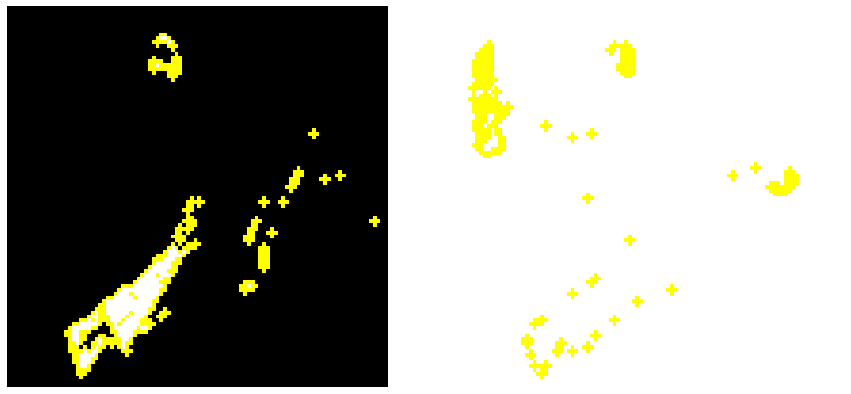

In [130]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [78]:
from tensorflow.keras.applications import inception_v3 as inc_net

In [96]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def transform_img_fn_ori():
  img = cv2.imread("/content/drive/MyDrive/Falldetection/Fall/fall001.jpg")
  img = cv2.resize(img, (299, 299))
  img = (img - 0.5)*2
  img = np.expand_dims(img, axis=0)
  preds = inet_model.predict(img)
  for i in decode_predictions(preds)[0]:
   print(i)
  return img

In [97]:
inet_model = inc_net.InceptionV3()
images_inc_im = transform_img_fn_ori()

('n03047690', 'clog', 1.0)
('n03950228', 'pitcher', 1.7514021e-16)
('n15075141', 'toilet_tissue', 0.0)
('n02319095', 'sea_urchin', 0.0)
('n02391049', 'zebra', 0.0)


  0%|          | 0/1000 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 298.5, 298.5, -0.5)

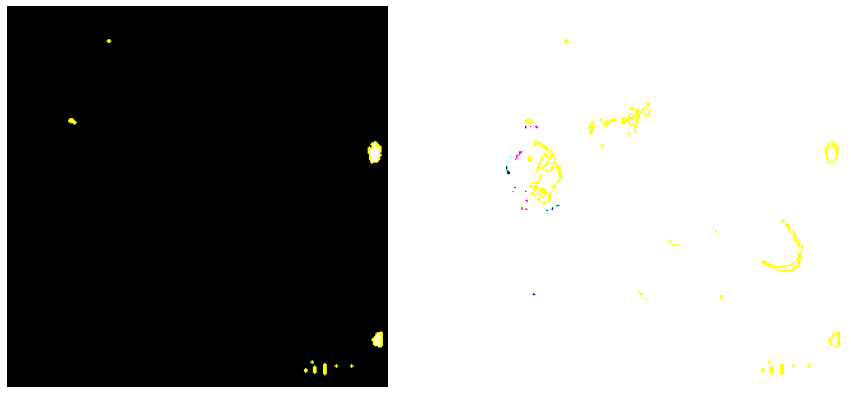

In [98]:
explanation= explainer.explain_instance(images_inc_im[0].astype('double'), inet_model.predict,  top_labels=3, hide_color=0, num_samples=1000)
 
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')